In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load dataset
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
# Check for missing values
print(df.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


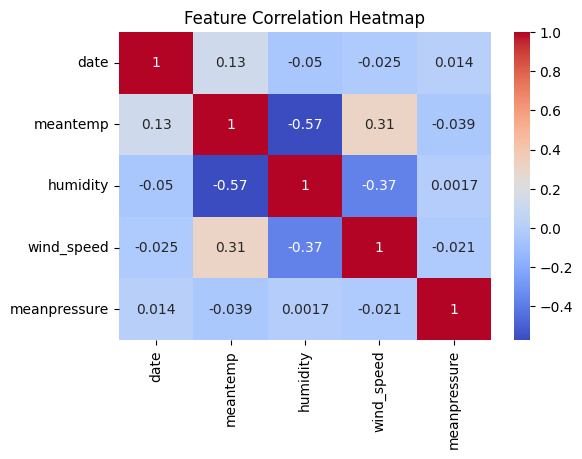

In [ ]:
# Plot correlations
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

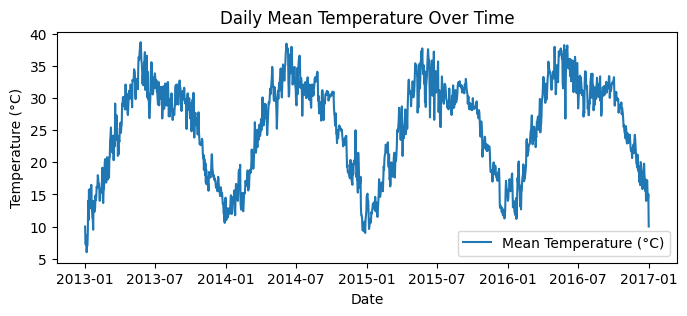

In [ ]:
# Trend of mean temperature
plt.figure(figsize=(8,3))
plt.plot(df['date'], df['meantemp'], label='Mean Temperature (°C)')
plt.title("Daily Mean Temperature Over Time")
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [ ]:
# Feature selection
X = df[['humidity', 'wind_speed', 'meanpressure']]
y = df['meantemp']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2
print("Linear Regression:", evaluate(y_test, y_pred_lr))
print("Random Forest:", evaluate(y_test, y_pred_rf))

Linear Regression: (5.202927351069218, np.float64(6.096305465619425), 0.3086806666447557)
Random Forest: (1.895181129013243, np.float64(2.6778852012130723), 0.8666081876954518)


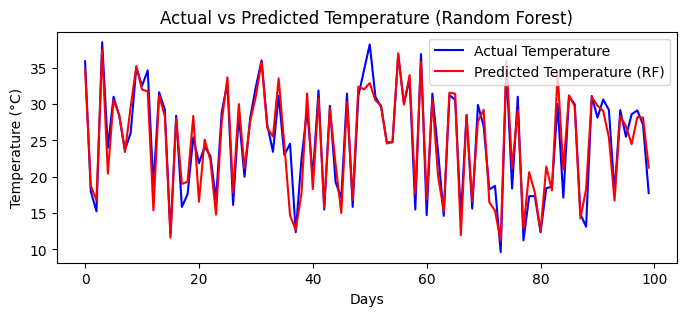

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(y_test.values[:100], label='Actual Temperature', color='blue')
plt.plot(y_pred_rf[:100], label='Predicted Temperature (RF)', color='red')
plt.title('Actual vs Predicted Temperature (Random Forest)')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Conclusive Results of Daily Mean Temperature Prediction

This project predicted daily mean temperature using humidity, wind speed, and mean pressure. Two models were tested — Linear Regression and Random Forest Regressor.
The Random Forest model outperformed Linear Regression, capturing complex, non-linear patterns and achieving high accuracy. It explained 87% of temperature variation, showing strong potential for practical weather forecasting. Future work can enhance results through added features, external data, and advanced ensemble models.